# Telecom Churn Prediction

The telecom industry faces a significant challenge in retaining customers, as increasing competition and evolving customer preferences contribute to a higher churn rate. **Churn** is defined as the percentage of subscribers who discontinue services within a given time period, poses a substantial threat to the revenue and sustainability of telecom service providers. To address this issue, there is a critical need for the development and implementation of an accurate and efficient churn prediction model.

The main aim of this project is to build Ensemble Machine learning Algorithms to predict the customer Churn.

## Understanding the dataset 

There are 7043 rows and 21 Features (Target Variable - Churn)

    1. customerID 

    2. gender - Whether the customer is a male or a female

    3. SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

    4. Partner - Whether the customer has a partner or not (Yes, No)

    5. Dependents - Whether the customer has dependents or not (Yes, No)

    6. tenure -Number of months the customer has stayed with the company

    7. PhoneService - Whether the customer has a phone service or not (Yes, No)

    8. MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

    9. InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

    10. OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

    11. OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

    12. DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

    13. TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

    14. StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

    15. StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

    16. Contract - The contract term of the customer (Month-to-month, One year, Two year)

    17. PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

    18. PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

    19. MonthlyCharges - The amount charged to the customer monthly

    20. TotalCharges - The total amount charged to the customer

    21. Churn - Whether the customer churned or not (Yes or No)

### Importing necessary libraries

In [1]:
## supressing warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### importing the dataset

In [3]:
df = pd.read_csv('telecom.csv')

In [4]:
# To display top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# To display bottom 5 rows 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# To check the dimension of the dataframe
df.shape

(7043, 21)

In [7]:
# statistical info of the dataset 

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# lets check the datatype of each column 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# To check the duplicates in the data set

df.duplicated().sum()

0

In [14]:
# To check the null values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Features - Churn, Monthly Charges and Total Charges

### Churn - Target Variable

In [22]:
# Count of Churn - Yes & No

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

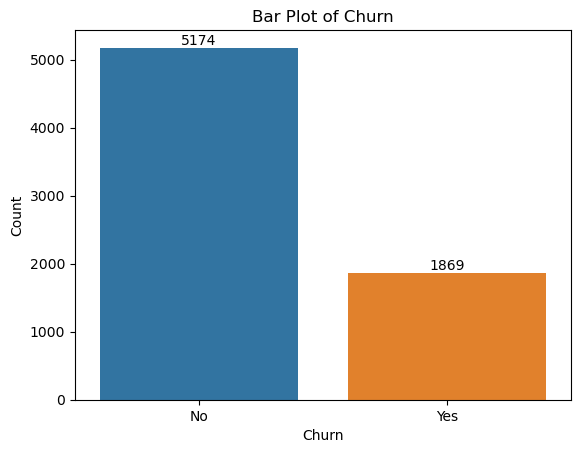

In [24]:
a = sns.countplot(df['Churn'])
a.bar_label(a.containers[0])
plt.title("Bar Plot of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

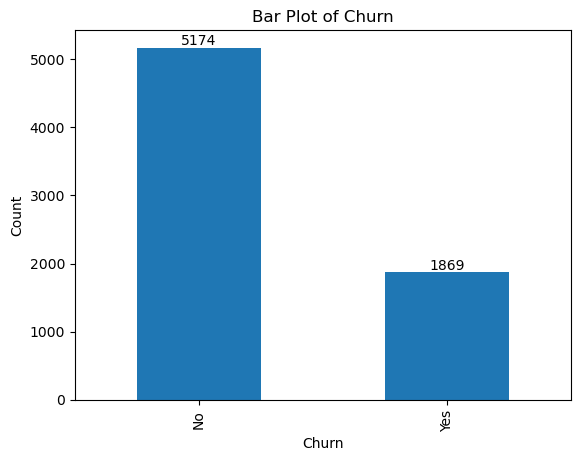

In [21]:
# plot of Churn

a = df['Churn'].value_counts().plot(kind = 'bar')
a.bar_label(a.containers[0])
plt.title("Bar Plot of Churn")
plt.ylabel("Count")
plt.xlabel("Churn")
plt.show()

### PaymentMethod 

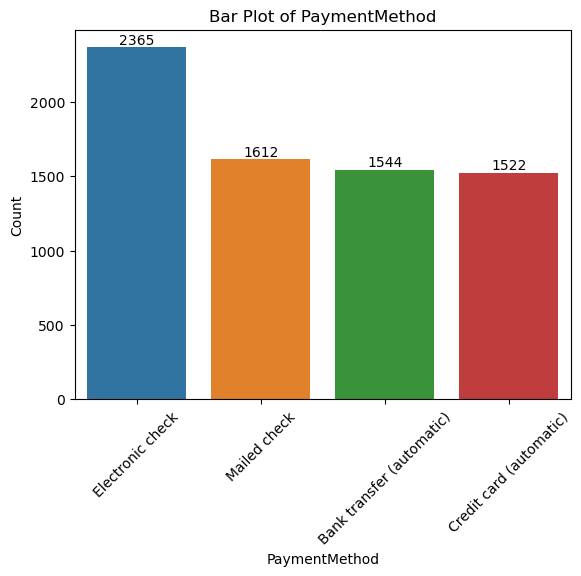

In [31]:
a = sns.countplot(df['PaymentMethod'])
a.bar_label(a.containers[0])
plt.xticks(rotation=45)
plt.title("Bar Plot of PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

From the above bar plot, the count of electronic check is higher than other Payment methods

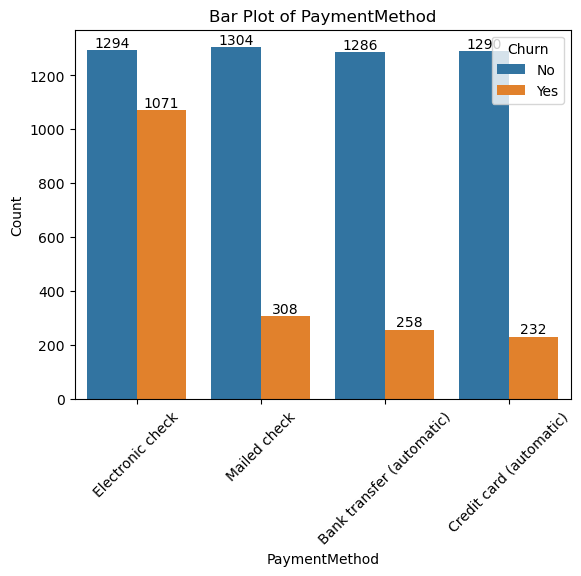

In [37]:
a = sns.countplot(df['PaymentMethod'],hue = df['Churn'])
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.xticks(rotation=45)
plt.title("Bar Plot of PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

## MonthlyCharges 

Text(0.5, 1.0, 'BoxPlot of Monthly Charges')

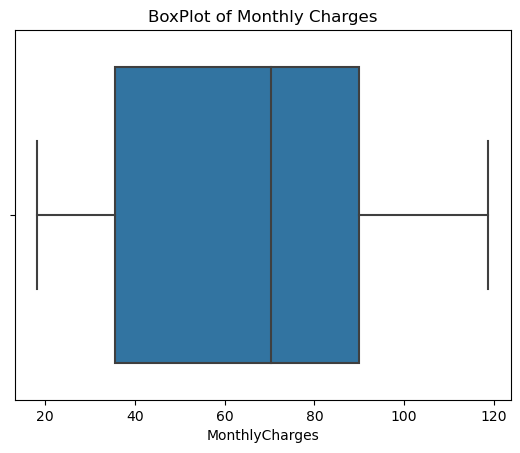

In [39]:
sns.boxplot(df['MonthlyCharges'])
plt.title("BoxPlot of Monthly Charges")

#### Histogram of Monthly Charges

Text(0.5, 1.0, 'Histogram of Monthly Charges')

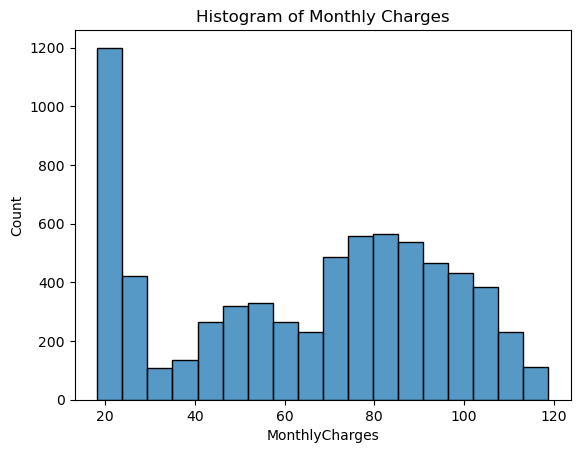

In [41]:
sns.histplot(df['MonthlyCharges'])
plt.title("Histogram of Monthly Charges")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

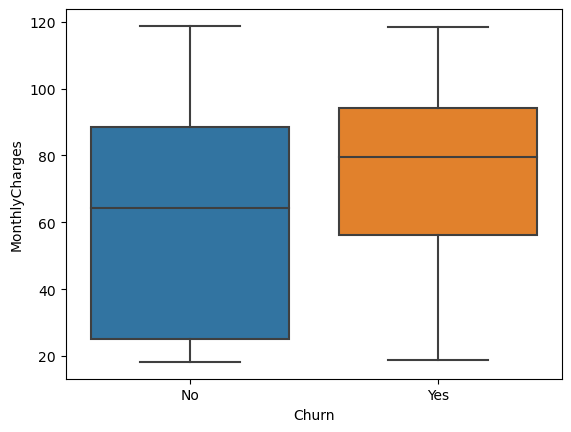

In [42]:
sns.boxplot(x = df['Churn'], y = df['MonthlyCharges'])

## TotalCharges

##### The datatype of TotalCharges is object, we shall convert this into int

In [47]:
#The varaible was imported as a string we need to convert it to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Text(0.5, 1.0, 'BoxPlot of Total Charges')

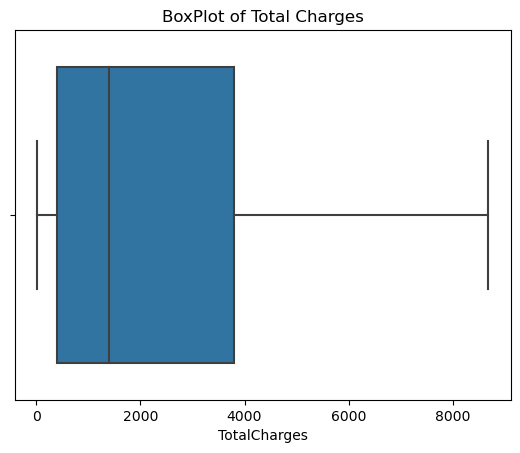

In [49]:
sns.boxplot(df['TotalCharges'])
plt.title("BoxPlot of Total Charges")

Text(0.5, 1.0, 'Histogram of Total Charges')

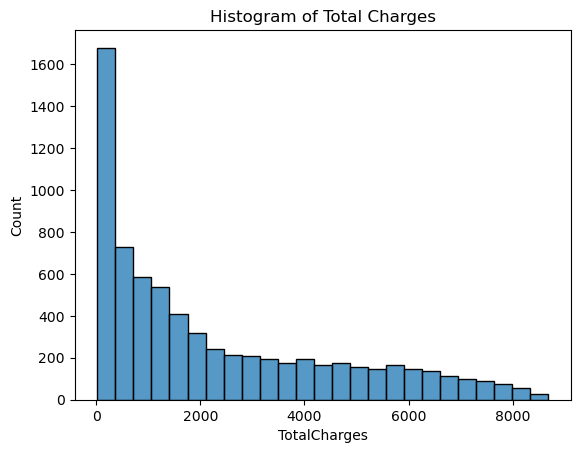

In [50]:
sns.histplot(df['TotalCharges'])
plt.title("Histogram of Total Charges")

##### The total charges in the dataset is positively skewed

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

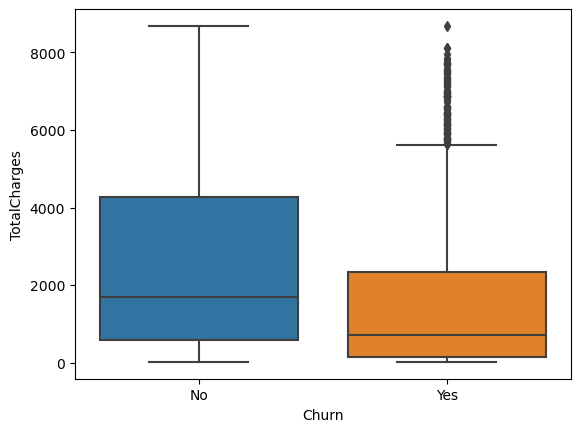

In [51]:
sns.boxplot(x = df['Churn'], y = df['TotalCharges'])